### Задача 1.
#### Двумерное уравнение теплопроводности с излучением на границах.

Рассмотрим процесс теплопереноса в пластине, на двух границах границах которой осуществляется теплообмен с внешней средой за счет излучения и конвекции.

Размеры пластины $L=H=0.3$м, материал - твердая резина ($\lambda = 0.16$ Вт/(м$\cdot$С), $\rho = 1190$ кг/м^3, $c = 1900$ Дж/(кг$\cdot$С)).

Начальная температура области решения $T_0 = 30$ C, $\kappa_1 = 50$ Вт/(м^2 $\cdot$ С), $T^{e1} = 20$ C, $\varepsilon = 0.8$, $\kappa_2 = 35$ Вт/(м^2 $\cdot$ С), $T^{e2} = 35$ C.

Математическая модель:

$$\rho c \frac{\partial T}{\partial t} = \lambda (\frac{\partial^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial y^2})$$

где $0 < x < L$, $0 < y < H$.

Начальные и граничные условия:

$t = 0$: $T = T_0, 0 \leqslant x \leqslant L$, $0 \leqslant y \leqslant H$,

$x = 0$: $-\lambda \frac{\partial T}{\partial x} = \kappa_1 (T^{e1} - T) + \varepsilon \sigma ((T^{e1})^4 - T^4)$, $t > 0$, $\kappa_1 > 0$,

$x = L$: $\frac{\partial T}{\partial x} = 0$, $t > 0$,

$y = 0$: $\frac{\partial T}{\partial y} = 0$, $t > 0$,

$y = H$: $\lambda \frac{\partial T}{\partial y} = \kappa_2 (T^{e2} - T) + \varepsilon \sigma ((T^{e2})^4 - T^4)$, $t > 0$, $\kappa_2 > 0$.

In [1]:
L = H = 0.3
Lambda = 0.16
rho = 1190
c = 1900
T_0 = 30
kappa_1 = 50
T_e1 = 20
epsilon = 0.8
epsilon_1 = 0.00001
kappa_2 = 35
T_e2 = 35
sigma = 5.669e-8

In [2]:
N_x = 100
N_y = 100
t_end = 36000

Определяем расчетные шаги сетки по пространственным координатам

In [3]:
h_x = L/(N_x - 1)
h_y = H/(N_y - 1)

Определяем расчетный шаг сетки по времени

In [4]:
tau = t_end/1000

Поле температуры в начальный момент времени

In [5]:
T = [[T_0] * (N_y+1)] * (N_x+1)
T_n = [[0] * (N_y+1)] * (N_x+1)

alpha = [0] * (max(N_x, N_y) + 1)
beta = [0] * (max(N_x, N_y) + 1)

In [6]:
time = 0

while time < t_end:
    time += tau
    
    for i in range(1, N_x+1):
        for j in range(1, N_y+1):
            T_n[i][j] = T[i][j]
            
    for j in range(1, N_y+1):
        alpha[1] = 2 * tau * Lambda / (2 * tau * (Lambda * kappa_1 * h_x) + rho * c * h_x**2)

        while True:
            d = T[1][j]
            beta[1] = (rho * c * h_x**2 * T_n[1][j] + 2 * tau * kappa_1 * h_x * T_e1 + 2 * tau * epsilon_1 * sigma * h_x * (T_e1**4 - d**4))/(2 * tau * (Lambda + kappa_1 * h_x) + rho * c * h_x**2)
            
            for i in range(2, N_x):
                a_i = Lambda/h_x**2
                b_i = 2 * Lambda/h_x**2 + rho*c/tau
                c_i = Lambda/h_x**2
                f_i = -rho*c*T_n[i][j]/tau
                alpha[i] = a_i/(b_i - c_i*alpha[i-1])
                beta[i] = (c_i*beta[i-1]-f_i)/(b_i-c_i*alpha[i-1])
        
            T[N_x][j] = (rho*c*h_x**2 * T_n[N_x][j] + 2*tau*Lambda*beta[N_x-1])/(rho*c*h_x**2 + 2*tau*Lambda*(1 - alpha[N_x-1]))
            
            for i in range(N_x-1, 0, -1):
                T[i][j] = alpha[i]*T[i+1][j] + beta[i]
                
            if abs(d - T[1][j]) <= epsilon:
                break
                
    for i in range(1, N_x+1):
        alpha[1] = 2 * tau * Lambda / (2 * tau * Lambda + rho * c * h_y**2)
        beta[1] = rho * c * h_y**2 * T[i][1] / (2 * tau * Lambda + rho * c * h_y**2)
        
        for j in range(2, N_y):
            a_i = Lambda/h_y**2
            b_i = 2 * Lambda/h_y**2 + rho*c/tau
            c_i = Lambda/h_y**2
            f_i = -rho*c*T[i][j]/tau
            alpha[j] = a_i/(b_i - c_i*alpha[j-1])
            beta[j] = (c_i * beta[j-1] - f_i)/(b_i - c_i * alpha[j-1])
            
        d = T[i][N_y]
        
        while True:
            d_1 = T[i][N_y]
            T[i][N_y] = (rho*c*h_y**2 * d + 2 * tau * (Lambda * beta[N_y-1] + kappa_2 * h_y * T_e2 + epsilon_1 * sigma * h_y*(T_e2**4 -d_1**4)))/(rho * c * h_y**2 + 2 * tau * (Lambda * (1-alpha[N_y-1])+kappa_2*h_y))
            
            if abs(d_1 - T[i][N_y]) <= epsilon:
                break
                
        for j in range(N_y-1, 0, -1):
                T[i][j] = alpha[j]*T[i][j+1] + beta[j]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

T_ = T[1:]
T_ = list(map(lambda l: l[1:], T_))

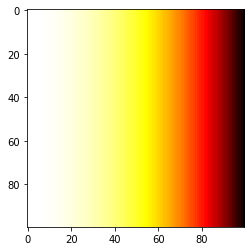

In [10]:
plt.imshow(np.array(T_),interpolation='nearest', cmap='hot')
plt.show()